In [1]:
import pandas as pd
import os
import OxiAnalysis as OA
import warnings; warnings.simplefilter('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data0 = pd.read_csv("/home/robbe/ionbot/site_occupancy_data/data0.csv")
data1 = pd.read_csv("/home/robbe/ionbot/site_occupancy_data/data1.csv")
data2 = pd.read_csv("/home/robbe/ionbot/site_occupancy_data/data2.csv")
data3 = pd.read_csv("/home/robbe/ionbot/site_occupancy_data/data3.csv")
data4 = pd.read_csv("/home/robbe/ionbot/site_occupancy_data/data4.csv")
# data5 = pd.read_csv("/home/robbe/ionbot/site_occupancy_data/data5.csv")
# data6 = pd.read_csv("/home/robbe/ionbot/site_occupancy_data/data6.csv")
datalist = [data0, data1, data2, data3, data4]
data = pd.concat(datalist)

In [3]:
data

,Unnamed: 0,Sequence,Base Sequence,Protein Groups,Intensity_QX01983,Intensity_QX01981_160316090220,Intensity_QX01867,Intensity_QX01870,Intensity_QX01873,Unnamed: 35,...,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Unnamed: 17,Intensity_qe1_2019oct05_05_uc190822_dw35_1c,Intensity_qe1_2019oct05_17_uc190822_dw35_4c,Intensity_qe1_2019oct05_06_uc190822_dw35_1b,Intensity_qe1_2019oct05_18_uc190822_dw35_4b,Intensity_qe1_2019oct05_07_uc190822_dw35_1a,Intensity_qe1_2019oct05_19_uc190822_dw35_4a,Unnamed: 43
0,0,AAAPQAWAGPMEEPPQAQAPPR11|[35]oxidation[M],AAAPQAWAGPMEEPPQAQAPPR,DREB_HUMAN,NaN,3.748266,3.576284,4.036680,4.688072,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,AAFDDAIAELDTLSEESYKDSTLIMQLLR25|[35]oxidation[M],AAFDDAIAELDTLSEESYKDSTLIMQLLR,1433E_HUMAN,4.201549,5.139395,4.388487,4.129953,4.585862,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22,AAHSEGNTTAGLDMR14|[35]oxidation[M],AAHSEGNTTAGLDMR,TCPB_HUMAN,4.249940,5.157119,4.834151,5.135300,4.788791,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36,AALAGGTTMIIDHVVPEPGTSLLAAFDQWR9|[35]oxidation[M],AALAGGTTMIIDHVVPEPGTSLLAAFDQWR,DPYL2_HUMAN,4.819749,4.813941,3.520422,4.193921,4.916850,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75,AALAGGTTMILDHVFPDTGVSLLAAYEQWR9|[35]oxidation[M],AALAGGTTMILDHVFPDTGVSLLAAYEQWR,DPYL4_HUMAN,4.242853,4.104052,NaN,NaN,3.889622,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,7271,YNILGTNAIMDK10|[35]oxidation[M],YNILGTNAIMDK,HNRL1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.593019,6.006641,6.024841,6.054946,NaN
617,7272,YNVLGAETVLNQMR13|[35]oxidation[M],YNVLGAETVLNQMR,HNRL2_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.247865,5.358815,6.564985,6.826284,NaN
618,7276,YSQFINFPIYVWSSK12|[351]Trp->Kynurenin[W],YSQFINFPIYVWSSK,ENPL_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.080860,NaN,4.222435,NaN,5.804330,5.648605,NaN
619,7289,YVMTTTTLER3|[35]oxidation[M],YVMTTTTLER,IF2A_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.981716,4.862779,5.136331,5.676288,NaN,NaN,NaN


In [4]:
data=data[data["RSA"].notna()]
data=data[~data["RSA"].str.contains("no")]

In [5]:
data

,Unnamed: 0,Sequence,Base Sequence,Protein Groups,Intensity_QX01983,Intensity_QX01981_160316090220,Intensity_QX01867,Intensity_QX01870,Intensity_QX01873,Unnamed: 35,...,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Unnamed: 17,Intensity_qe1_2019oct05_05_uc190822_dw35_1c,Intensity_qe1_2019oct05_17_uc190822_dw35_4c,Intensity_qe1_2019oct05_06_uc190822_dw35_1b,Intensity_qe1_2019oct05_18_uc190822_dw35_4b,Intensity_qe1_2019oct05_07_uc190822_dw35_1a,Intensity_qe1_2019oct05_19_uc190822_dw35_4a,Unnamed: 43
1,13,AAFDDAIAELDTLSEESYKDSTLIMQLLR25|[35]oxidation[M],AAFDDAIAELDTLSEESYKDSTLIMQLLR,1433E_HUMAN,4.201549,5.139395,4.388487,4.129953,4.585862,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22,AAHSEGNTTAGLDMR14|[35]oxidation[M],AAHSEGNTTAGLDMR,TCPB_HUMAN,4.249940,5.157119,4.834151,5.135300,4.788791,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36,AALAGGTTMIIDHVVPEPGTSLLAAFDQWR9|[35]oxidation[M],AALAGGTTMIIDHVVPEPGTSLLAAFDQWR,DPYL2_HUMAN,4.819749,4.813941,3.520422,4.193921,4.916850,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75,AALAGGTTMILDHVFPDTGVSLLAAYEQWR9|[35]oxidation[M],AALAGGTTMILDHVFPDTGVSLLAAYEQWR,DPYL4_HUMAN,4.242853,4.104052,NaN,NaN,3.889622,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,95,AALVGGTTMIIDHVVPEPGSSLLTSFEK9|[35]oxidation[M],AALVGGTTMIIDHVVPEPGSSLLTSFEK,DPYL1_HUMAN,4.929513,5.129053,4.673202,4.769592,5.168957,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,7201,YHTSQSGDEMTSLSEYVSR10|[35]oxidation[M],YHTSQSGDEMTSLSEYVSR,HS90B_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.532679,6.746848,5.424811,5.065024,NaN
609,7227,YHTVNGHNCEVR9|[345]Trioxidation[C],YHTVNGHNCEVR,ROA1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.409610,4.197022,5.033765,4.674806,NaN,NaN,NaN
610,7228,YHTVNGHNCEVRK9|[345]Trioxidation[C],YHTVNGHNCEVRK,;ROA1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.417396,4.408682,5.733216,5.605905,3.240274,NaN,NaN
618,7276,YSQFINFPIYVWSSK12|[351]Trp->Kynurenin[W],YSQFINFPIYVWSSK,ENPL_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.080860,NaN,4.222435,NaN,5.804330,5.648605,NaN


In [6]:
import re

In [7]:
data["RSA"] = pd.to_numeric(data["RSA"])
pat = re.compile(r"\](.*?)\[")
data["Mod"] = data["modifications"].apply(lambda x: re.search(pat, x)[1].capitalize())

In [8]:
data

,Unnamed: 0,Sequence,Base Sequence,Protein Groups,Intensity_QX01983,Intensity_QX01981_160316090220,Intensity_QX01867,Intensity_QX01870,Intensity_QX01873,Unnamed: 35,...,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Unnamed: 17,Intensity_qe1_2019oct05_05_uc190822_dw35_1c,Intensity_qe1_2019oct05_17_uc190822_dw35_4c,Intensity_qe1_2019oct05_06_uc190822_dw35_1b,Intensity_qe1_2019oct05_18_uc190822_dw35_4b,Intensity_qe1_2019oct05_07_uc190822_dw35_1a,Intensity_qe1_2019oct05_19_uc190822_dw35_4a,Unnamed: 43,Mod
1,13,AAFDDAIAELDTLSEESYKDSTLIMQLLR25|[35]oxidation[M],AAFDDAIAELDTLSEESYKDSTLIMQLLR,1433E_HUMAN,4.201549,5.139395,4.388487,4.129953,4.585862,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oxidation
2,22,AAHSEGNTTAGLDMR14|[35]oxidation[M],AAHSEGNTTAGLDMR,TCPB_HUMAN,4.249940,5.157119,4.834151,5.135300,4.788791,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oxidation
3,36,AALAGGTTMIIDHVVPEPGTSLLAAFDQWR9|[35]oxidation[M],AALAGGTTMIIDHVVPEPGTSLLAAFDQWR,DPYL2_HUMAN,4.819749,4.813941,3.520422,4.193921,4.916850,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oxidation
4,75,AALAGGTTMILDHVFPDTGVSLLAAYEQWR9|[35]oxidation[M],AALAGGTTMILDHVFPDTGVSLLAAYEQWR,DPYL4_HUMAN,4.242853,4.104052,NaN,NaN,3.889622,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oxidation
6,95,AALVGGTTMIIDHVVPEPGSSLLTSFEK9|[35]oxidation[M],AALVGGTTMIIDHVVPEPGSSLLTSFEK,DPYL1_HUMAN,4.929513,5.129053,4.673202,4.769592,5.168957,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oxidation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,7201,YHTSQSGDEMTSLSEYVSR10|[35]oxidation[M],YHTSQSGDEMTSLSEYVSR,HS90B_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.532679,6.746848,5.424811,5.065024,NaN,Oxidation
609,7227,YHTVNGHNCEVR9|[345]Trioxidation[C],YHTVNGHNCEVR,ROA1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.409610,4.197022,5.033765,4.674806,NaN,NaN,NaN,Trioxidation
610,7228,YHTVNGHNCEVRK9|[345]Trioxidation[C],YHTVNGHNCEVRK,;ROA1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.417396,4.408682,5.733216,5.605905,3.240274,NaN,NaN,Trioxidation
618,7276,YSQFINFPIYVWSSK12|[351]Trp->Kynurenin[W],YSQFINFPIYVWSSK,ENPL_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.080860,NaN,4.222435,NaN,5.804330,5.648605,NaN,Trp->kynurenin


In [9]:
data = data[data["Site_occupancy"] != 1]

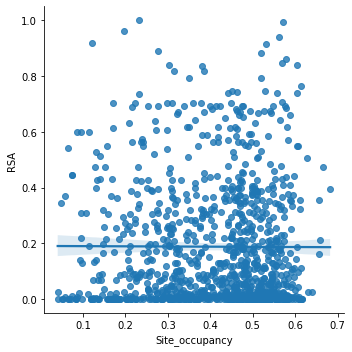

In [10]:
sns.lmplot(data=data, x="Site_occupancy", y="RSA")

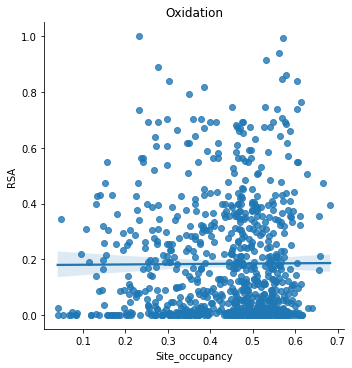

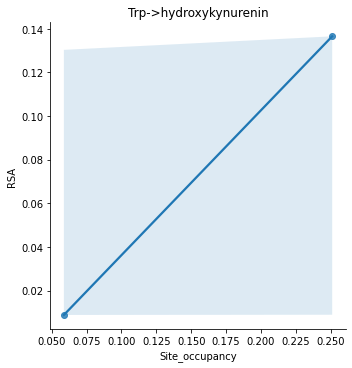

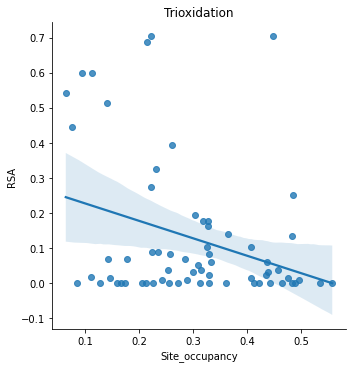

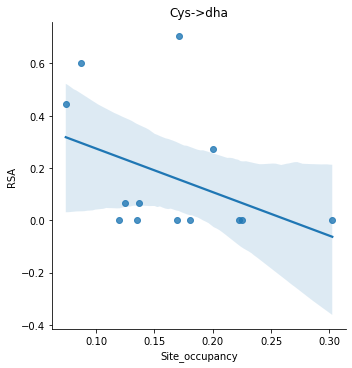

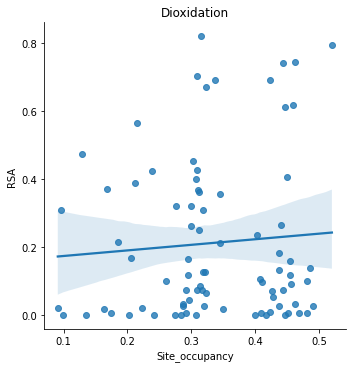

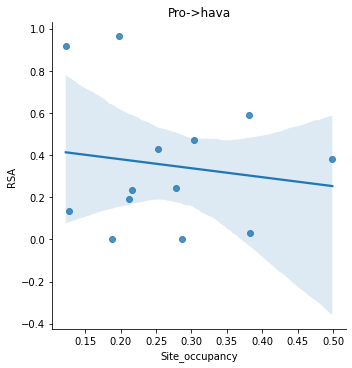

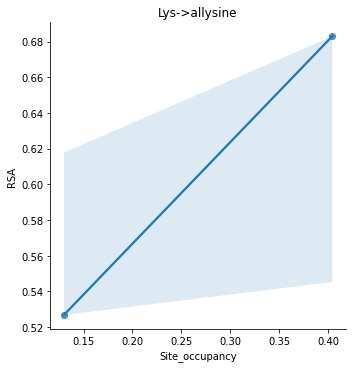

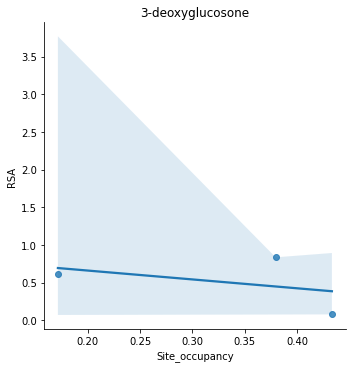

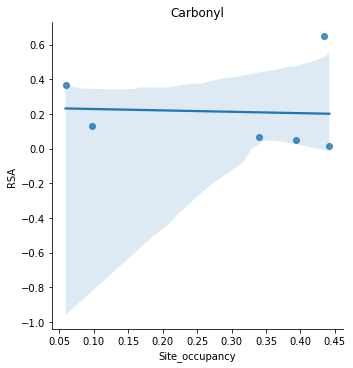

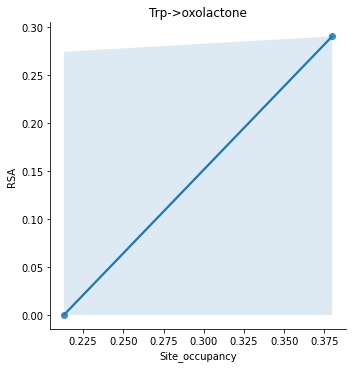

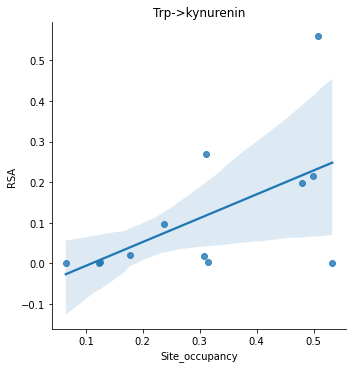

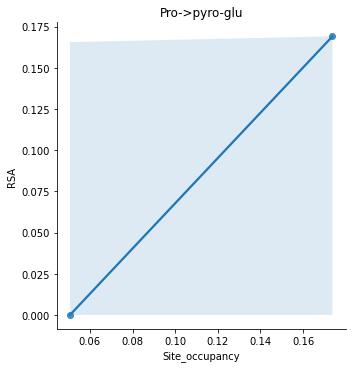

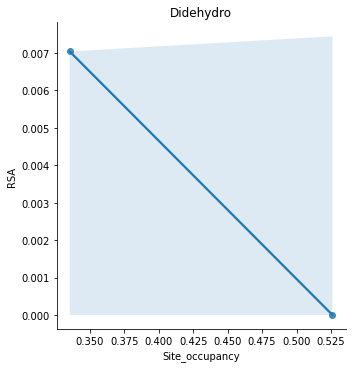

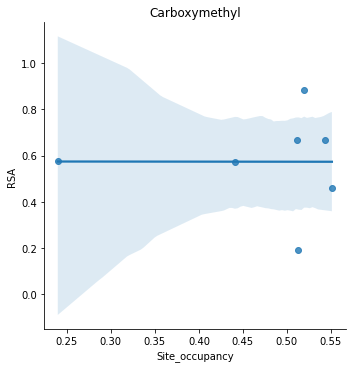

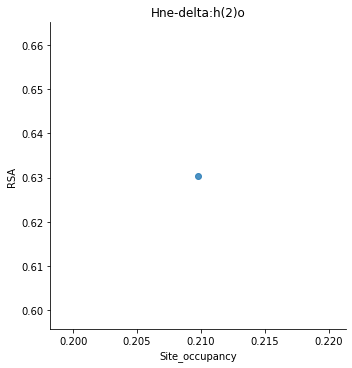

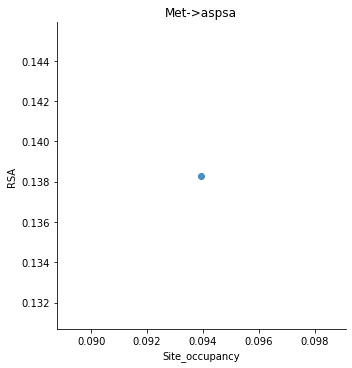

In [11]:
for mod in data["Mod"].unique():
    moddata = data[data["Mod"] == mod]
    sns.lmplot(data=moddata, x="Site_occupancy", y="RSA")
    ax = plt.gca()
    ax.set_title(mod)